In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()     

In [2]:
all_df = pd.read_csv("spotify-2023.csv", encoding="latin-1")

In [3]:
all_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Data Pre-Processing

## Look for NaN Values

In [5]:
all_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

There are NaN values for in_shazam_charts and key.

Since the number of songs in key is high (almost 10% of the dataset), I'm just gonna remove these songs first although I could try some other methods to impute these NaN values

In [6]:
key_dropped = all_df.dropna(subset=['key'])

In [7]:
key_dropped.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
clean_df = key_dropped.copy()
clean_df['in_shazam_charts'] = pd.DataFrame(key_dropped['in_shazam_charts'].fillna(0))
clean_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Create Feature for Second Artists and Third Artists

Some songs have more than one artist. Create new columns for the second and third artists. Fourth artists will be considered as insignificant and ignored if there are >=4 artists

In [9]:
#seperate the artist names using str.split()
artist_df = clean_df["artist(s)_name"].str.split(',', expand=True)
artist_df

,0,1,2,3,4,5,6,7
0,Latto,Jung Kook,None,None,None,None,None,None
1,Myke Towers,None,None,None,None,None,None,None
2,Olivia Rodrigo,None,None,None,None,None,None,None
3,Taylor Swift,None,None,None,None,None,None,None
4,Bad Bunny,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
948,Selena Gomez,None,None,None,None,None,None,None
949,Taylor Swift,None,None,None,None,None,None,None
950,Feid,Paulo Londra,None,None,None,None,None,None
951,Feid,Sech,Jhayco,None,None,None,None,None


In [10]:
#Add new columns for first, second and third artists
clean_df["artist_1"] = artist_df[0]
clean_df["artist_2"] = artist_df[1]
clean_df["artist_3"] = artist_df[2]

#removing artist(s)_name column
clean_df = clean_df.drop("artist(s)_name", axis=1)

#move newly created columns to the front
clean_df.insert(1, 'artist_1', clean_df.pop('artist_1'))
clean_df.insert(2, 'artist_2', clean_df.pop('artist_2'))
clean_df.insert(3, 'artist_3', clean_df.pop('artist_3'))
clean_df

,track_name,artist_1,artist_2,artist_3,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,None,2,2023,7,14,553,147,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,None,None,1,2023,3,23,1474,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,None,None,1,2023,6,30,1397,113,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,None,None,1,2019,8,23,7858,100,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,None,None,1,2023,5,18,3133,50,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,None,None,1,2022,11,3,953,0,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,None,None,1,2022,10,21,1180,0,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),Feid,Paulo Londra,None,2,2022,11,3,573,0,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,Sech,Jhayco,3,2022,10,20,1320,0,...,97,C#,Major,82,67,77,8,0,12,5


In [11]:
clean_df.isnull().sum()

track_name                0
artist_1                  0
artist_2                527
artist_3                758
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts          0
bpm                       0
key                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64

Splitting the artist column results in more NaN values that have to be cleaned. Just replace the Nan with 'empty'

In [12]:
#replace all the NaN values in artist_1 and artist_2 with "empty"
cleaner_df = clean_df.copy()
cleaner_df['artist_2'] = pd.DataFrame(clean_df['artist_2'].fillna("empty"))

even_cleaner_df = cleaner_df.copy()
even_cleaner_df['artist_3'] = pd.DataFrame(cleaner_df['artist_3'].fillna("empty")) 
even_cleaner_df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [13]:
df = even_cleaner_df

## Creating New Feature for Age of Songs

Since this data wass collected in 2023, we will set the current year as 2023.
$$
Song\;Age = 2023 - Released\;Year
$$

This new feature can be improved by using python's datetime module to compare the time between two dates

In [14]:
df['age'] = 2023 - df['released_year']
df.insert(6, "age", df.pop("age"))

In [15]:
df

,track_name,artist_1,artist_2,artist_3,artist_count,released_year,age,released_month,released_day,in_spotify_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,empty,2,2023,0,7,14,553,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,empty,empty,1,2023,0,3,23,1474,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,empty,empty,1,2023,0,6,30,1397,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,empty,empty,1,2019,4,8,23,7858,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,empty,empty,1,2023,0,5,18,3133,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,empty,empty,1,2022,1,11,3,953,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,empty,empty,1,2022,1,10,21,1180,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),Feid,Paulo Londra,empty,2,2022,1,11,3,573,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,Sech,Jhayco,3,2022,1,10,20,1320,...,97,C#,Major,82,67,77,8,0,12,5


## One-Hot Encoding Categorical Variables

variables to encode are artist names, key and mode

In [16]:
#import one-hot encoder and initialise it
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['track_name',
 'artist_1',
 'artist_2',
 'artist_3',
 'streams',
 'in_deezer_playlists',
 'in_shazam_charts',
 'key',
 'mode']

We gonna do some quick fixes on the streams, in_deezer_playlists and in_shazam_charts because they are appearing as objects

## Fixing numerical data appearing as objects

### Fixing Streams

In [18]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df[df['streams'].isna()]['streams']

574   NaN
Name: streams, dtype: float64

One of the songs did not convert properly so we try doing it manually

In [19]:
all_df.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

The data was corrupted thats why it could not convert. Let's just delete this row.

In [20]:
df = df.dropna(subset=['streams'])
df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
age                     0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Fixing in_deezer_playlists

The bigger numbers have commas in them which lead to issues converting them into numbers. We first remove those commas

In [21]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')

/tmp/ipykernel_3356/258393240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')


In [22]:
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

/tmp/ipykernel_3356/2871607463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')


In [23]:
df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
age                     0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Fixing in Shazam Charts

This column suffers from the same issue as deezer's

In [24]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.isnull().sum()

/tmp/ipykernel_3356/2242003826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
/tmp/ipykernel_3356/2242003826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


track_name               0
artist_1                 0
artist_2                 0
artist_3                 0
artist_count             0
released_year            0
age                      0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [25]:
df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0)) 
df.isnull().sum()

/tmp/ipykernel_3356/1676298079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0))


track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
age                     0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

reset indexes

In [26]:
df = df.reset_index(drop=True)
df

,track_name,artist_1,artist_2,artist_3,artist_count,released_year,age,released_month,released_day,in_spotify_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,empty,2,2023,0,7,14,553,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,empty,empty,1,2023,0,3,23,1474,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,empty,empty,1,2023,0,6,30,1397,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,empty,empty,1,2019,4,8,23,7858,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,empty,empty,1,2023,0,5,18,3133,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,My Mind & Me,Selena Gomez,empty,empty,1,2022,1,11,3,953,...,144,A,Major,60,24,39,57,0,8,3
853,Bigger Than The Whole Sky,Taylor Swift,empty,empty,1,2022,1,10,21,1180,...,166,F#,Major,42,7,24,83,1,12,6
854,A Veces (feat. Feid),Feid,Paulo Londra,empty,2,2022,1,11,3,573,...,92,C#,Major,80,81,67,4,0,8,6
855,En La De Ella,Feid,Sech,Jhayco,3,2022,1,10,20,1320,...,97,C#,Major,82,67,77,8,0,12,5


Hooray! All clean!

## Back to  One-Hot Encoding

In [27]:
ohe = encoder.fit_transform(df[['artist_1', 'artist_2', 'artist_3', 'key', 'mode']])
encoded_df = pd.DataFrame(ohe, columns = encoder.get_feature_names_out(['artist_1', 'artist_2', 'artist_3', 'key', 'mode']))

In [28]:
encoded_df

,artist_1_(G)I-DLE,artist_1_21 Savage,artist_1_24kgoldn,artist_1_50 Cent,artist_1_A$AP Rocky,artist_1_Abhijay Sharma,artist_1_Adele,artist_1_Aerosmith,artist_1_Agust D,artist_1_Aitana,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


we concatenate this to our main dataframe later

## Creating new feature for whether songs appear in spotify charts or not

In [29]:
df['spotify_chart_appear'] = pd.DataFrame(map(lambda x: True if x!= 0 else False, df['in_spotify_charts']))
df

,track_name,artist_1,artist_2,artist_3,artist_count,released_year,age,released_month,released_day,in_spotify_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,spotify_chart_appear
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,empty,2,2023,0,7,14,553,...,B,Major,80,89,83,31,0,8,4,True
1,LALA,Myke Towers,empty,empty,1,2023,0,3,23,1474,...,C#,Major,71,61,74,7,0,10,4,True
2,vampire,Olivia Rodrigo,empty,empty,1,2023,0,6,30,1397,...,F,Major,51,32,53,17,0,31,6,True
3,Cruel Summer,Taylor Swift,empty,empty,1,2019,4,8,23,7858,...,A,Major,55,58,72,11,0,11,15,True
4,WHERE SHE GOES,Bad Bunny,empty,empty,1,2023,0,5,18,3133,...,A,Minor,65,23,80,14,63,11,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,My Mind & Me,Selena Gomez,empty,empty,1,2022,1,11,3,953,...,A,Major,60,24,39,57,0,8,3,False
853,Bigger Than The Whole Sky,Taylor Swift,empty,empty,1,2022,1,10,21,1180,...,F#,Major,42,7,24,83,1,12,6,False
854,A Veces (feat. Feid),Feid,Paulo Londra,empty,2,2022,1,11,3,573,...,C#,Major,80,81,67,4,0,8,6,False
855,En La De Ella,Feid,Sech,Jhayco,3,2022,1,10,20,1320,...,C#,Major,82,67,77,8,0,12,5,False


## Feature for top 100 songs

In [30]:
df['spotify_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_spotify_charts']))
df[['spotify_top_100', 'in_spotify_charts']]

,spotify_top_100,in_spotify_charts
0,0,147
1,1,48
2,0,113
3,1,100
4,1,50
...,...,...
852,0,0
853,0,0
854,0,0
855,0,0


## Quick Relook at the data

In [31]:
combined_df = pd.concat([df, encoded_df], axis=1)

In [32]:
#check for NaN values
combined_df.isnull().values.any()

False

In [33]:
#create numerical dataframe
numericals = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_df = combined_df[numericals]
numerical_df = numerical_df.drop(['released_year', 'released_month', 'released_day', 'age', 'artist_count', 'spotify_chart_appear',
                                 'spotify_top_100'], axis='columns')

#create categorical dataframe
categoricals = df.select_dtypes(include=['object']).columns.tolist()
categorical_df = combined_df[categoricals]
extras = pd.DataFrame(df[['released_year', 'released_month', 'released_day', 'age', 'artist_count', 'spotify_chart_appear',
                        'spotify_top_100']])
categorical_df = pd.concat([categorical_df, extras], axis=1)

In [34]:
numerical_df

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,553,147,141381703.0,43,263,45,10,826.0,125,80,89,83,31,0,8,4
1,1474,48,133716286.0,48,126,58,14,382.0,92,71,61,74,7,0,10,4
2,1397,113,140003974.0,94,207,91,14,949.0,138,51,32,53,17,0,31,6
3,7858,100,800840817.0,116,207,125,12,548.0,170,55,58,72,11,0,11,15
4,3133,50,303236322.0,84,133,87,15,425.0,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,953,0,91473363.0,61,13,37,1,0.0,144,60,24,39,57,0,8,3
853,1180,0,121871870.0,4,0,8,0,0.0,166,42,7,24,83,1,12,6
854,573,0,73513683.0,2,0,7,0,0.0,92,80,81,67,4,0,8,6
855,1320,0,133895612.0,29,26,17,0,0.0,97,82,67,77,8,0,12,5


In [35]:
categorical_df

,track_name,artist_1,artist_2,artist_3,key,mode,released_year,released_month,released_day,age,artist_count,spotify_chart_appear,spotify_top_100
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,empty,B,Major,2023,7,14,0,2,True,0
1,LALA,Myke Towers,empty,empty,C#,Major,2023,3,23,0,1,True,1
2,vampire,Olivia Rodrigo,empty,empty,F,Major,2023,6,30,0,1,True,0
3,Cruel Summer,Taylor Swift,empty,empty,A,Major,2019,8,23,4,1,True,1
4,WHERE SHE GOES,Bad Bunny,empty,empty,A,Minor,2023,5,18,0,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,My Mind & Me,Selena Gomez,empty,empty,A,Major,2022,11,3,1,1,False,0
853,Bigger Than The Whole Sky,Taylor Swift,empty,empty,F#,Major,2022,10,21,1,1,False,0
854,A Veces (feat. Feid),Feid,Paulo Londra,empty,C#,Major,2022,11,3,1,2,False,0
855,En La De Ella,Feid,Sech,Jhayco,C#,Major,2022,10,20,1,3,False,0


In [36]:
numerical_df.describe()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,857.000000,857.000000,8.570000e+02,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,5204.997666,11.959160,5.133554e+08,67.383897,51.044341,395.284714,2.619603,54.865811,122.842474,67.273046,51.219370,64.339557,26.644107,1.611435,18.175029,10.396733
std,7944.032885,19.194211,5.714855e+08,86.562405,50.407409,1153.124378,5.770938,150.396554,28.196567,14.653159,23.594579,16.056348,25.688111,8.570734,13.569471,10.090890
min,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,859.000000,0.000000,1.391938e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,2226.000000,3.000000,2.849083e+08,34.000000,38.000000,43.000000,0.000000,2.000000,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,5542.000000,16.000000,6.740727e+08,85.000000,85.000000,164.000000,2.000000,35.000000,142.000000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000
max,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,46.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## I might want to add scaling/normalisation to the data also

## Data Visualisation

<Axes: xlabel='spotify_top_100', ylabel='count'>

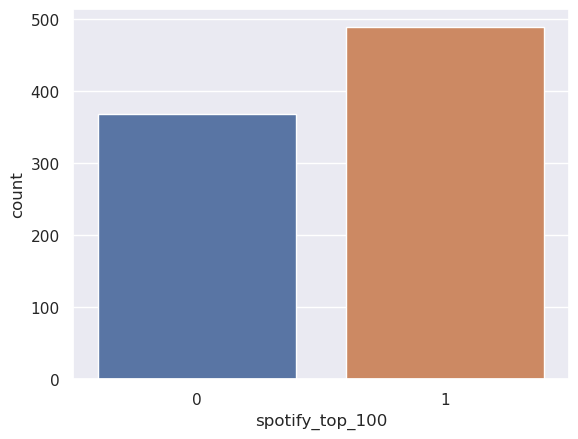

In [37]:
sb.countplot(data=combined_df, x='spotify_top_100')

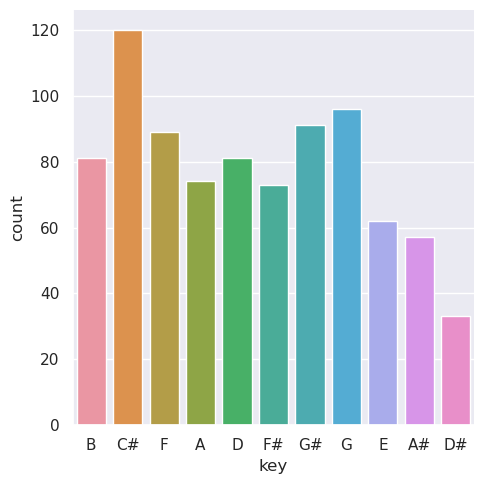

In [38]:
sb.catplot(data=df, x='key', kind='count')

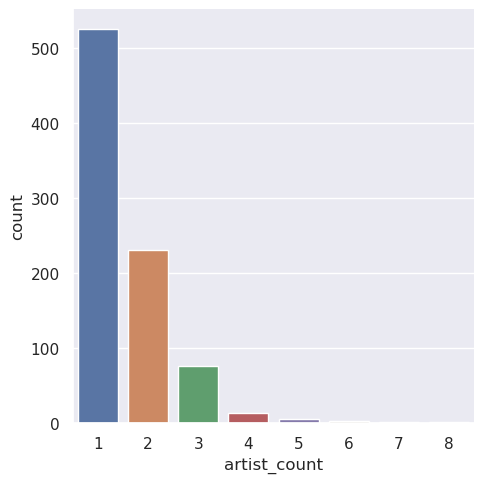

In [39]:
sb.catplot(data=df, x='artist_count', kind='count')

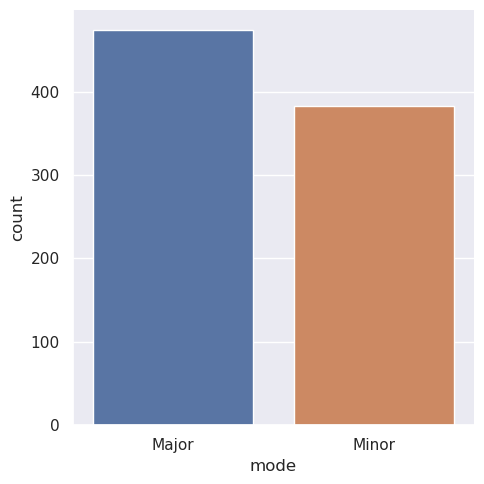

In [40]:
sb.catplot(data=df, x='mode', kind='count')

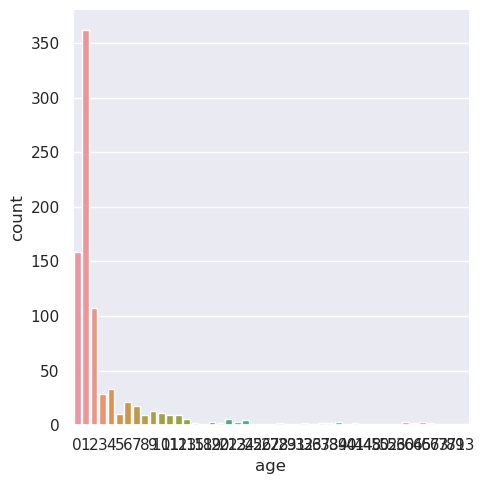

In [41]:
sb.catplot(data=df, x='age', kind='count')

<Axes: xlabel='bpm'>

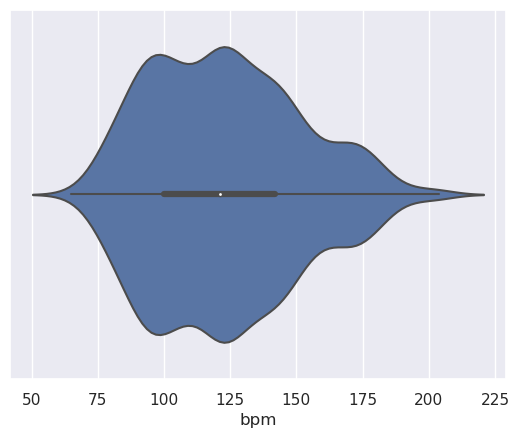

In [42]:
sb.violinplot(data=df, x='bpm')

/home/tinkybala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tinkybala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


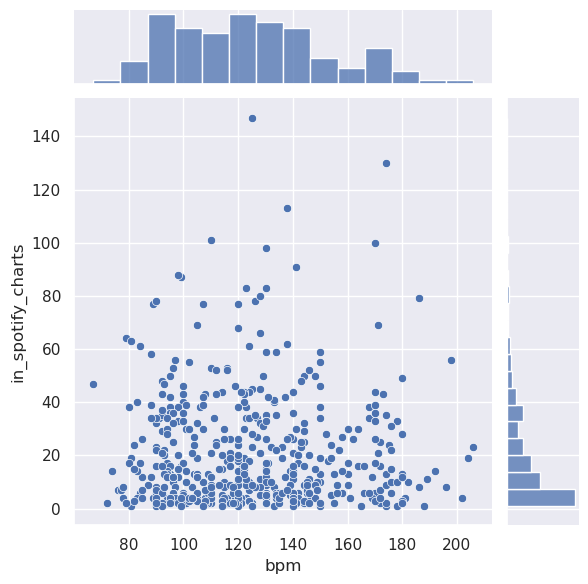

In [43]:
sb.jointplot(data=df[df['spotify_chart_appear'] == True], x='bpm', y='in_spotify_charts')

In [44]:
#sb.pairplot(data=numerical_df)

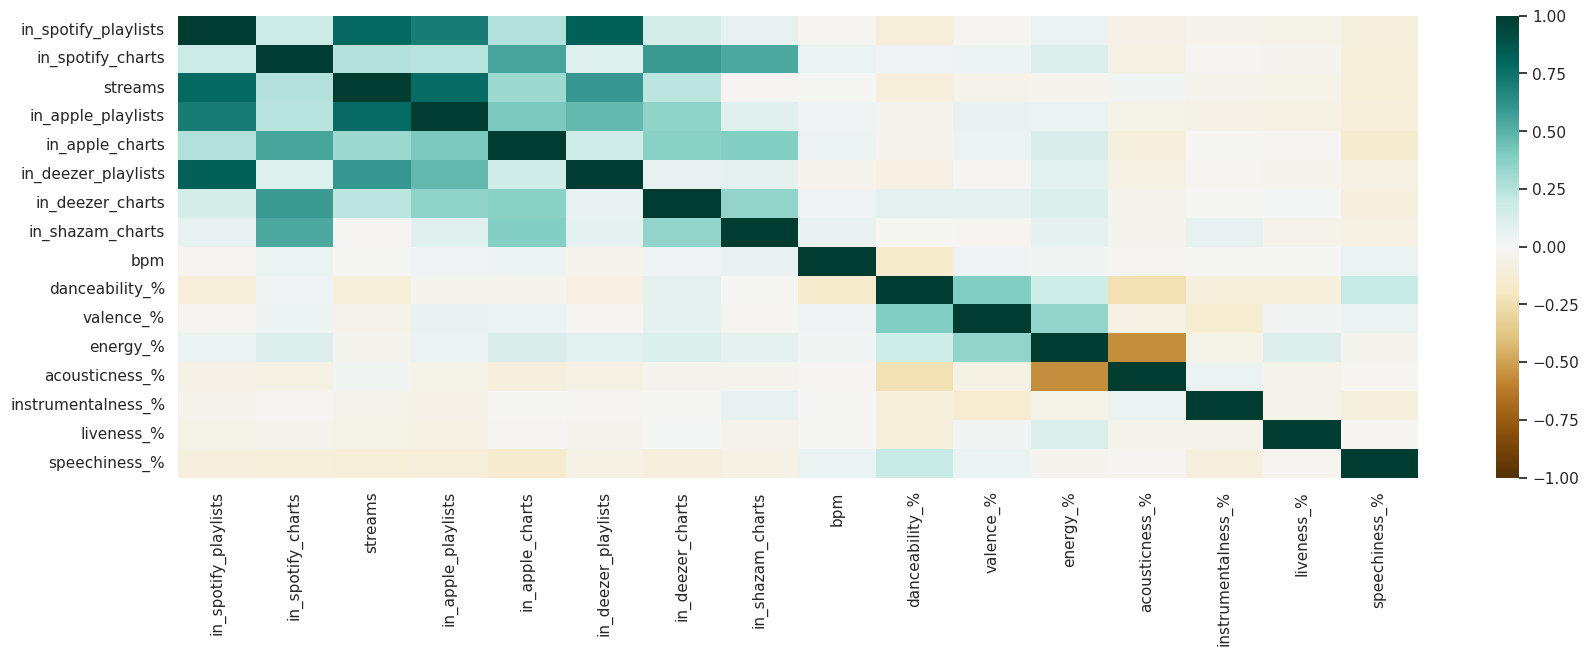

In [45]:
plt.figure(figsize=(20, 6))
heatmap = sb.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG')

<Axes: xlabel='spotify_top_100', ylabel='bpm'>

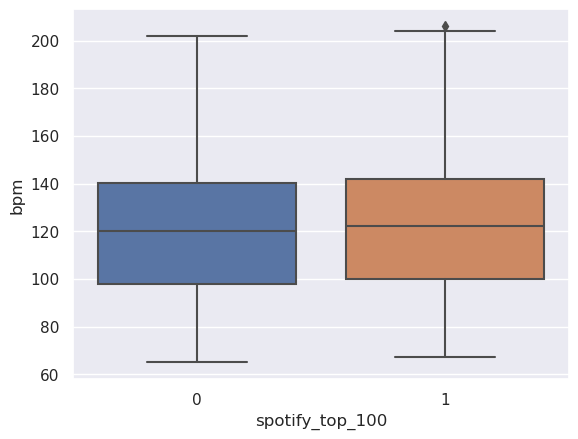

In [46]:
sb.boxplot(data=combined_df, x='spotify_top_100', y='bpm')

/home/tinkybala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='key', ylabel='Percent'>

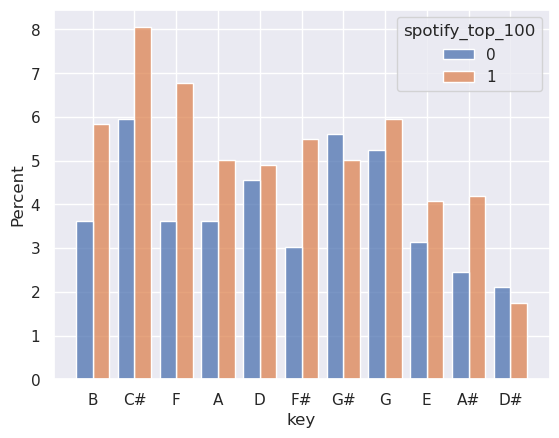

In [47]:
sb.histplot(data=categorical_df, x='key', hue='spotify_top_100', multiple='dodge', shrink=.8, stat='percent')

Seems like certain keys are more likely to be top songs

/home/tinkybala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mode', ylabel='Percent'>

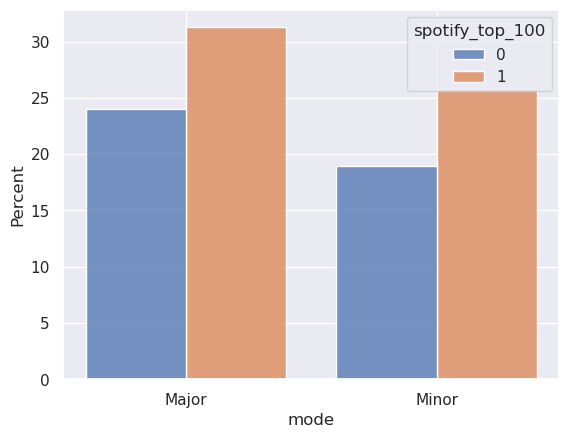

In [48]:
sb.histplot(data=categorical_df, x='mode', hue='spotify_top_100', multiple='dodge', shrink=.8, stat='percent')

Apparently, the loss function im using requires scaling my predictors to between 0-1 so im gonna do that 

## Splitting and Scaling the Dataset

In [49]:
from sklearn.model_selection import train_test_split

Apparently the neural network only takes in number inputs so i'm gonna make a dataframe of only numerical datatypes

In [50]:
neural_df = combined_df.drop(['track_name', 'artist_1', 'artist_2', 'artist_3', 'key', 'mode'], axis='columns')

In [51]:
#import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
#Initialse the scaler
scaler = MinMaxScaler()

In [52]:
#scaling the data using StandardScaler from sklearn 
scaled_df = pd.DataFrame(scaler.fit_transform(neural_df), columns = list(neural_df))
scaled_df

,artist_count,released_year,age,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.142857,1.000000,0.000000,0.545455,0.433333,0.009874,1.000000,0.038170,0.063988,0.956364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.000000,0.000000,0.181818,0.733333,0.027295,0.326531,0.036101,0.071429,0.458182,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,1.000000,0.000000,0.454545,0.966667,0.025838,0.768707,0.037798,0.139881,0.752727,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.956989,0.043011,0.636364,0.733333,0.148051,0.680272,0.216215,0.172619,0.752727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.000000,0.000000,0.363636,0.566667,0.058676,0.340136,0.081869,0.125000,0.483636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.000000,0.989247,0.010753,0.909091,0.066667,0.017440,0.000000,0.024696,0.090774,0.047273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.000000,0.989247,0.010753,0.818182,0.666667,0.021734,0.000000,0.032903,0.005952,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.142857,0.989247,0.010753,0.909091,0.066667,0.010252,0.000000,0.019847,0.002976,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.285714,0.989247,0.010753,0.818182,0.633333,0.024382,0.000000,0.036149,0.043155,0.094545,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
train, test = train_test_split(scaled_df, test_size=0.25)

In [54]:
train_shape = train.shape
train.shape

(642, 781)

In [55]:
test_shape = test.shape
test.shape

(215, 781)

In [56]:
X_train = train.copy()
X_test = test.copy()

In [57]:
Y_train = train.pop('spotify_top_100')
Y_test = test.pop('spotify_top_100')

## Modelling!

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

2024-04-01 01:12:21.307784: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 01:12:21.311594: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 01:12:21.417149: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 01:12:22.683440: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [79]:
#include a callback for ealy stopping whch stops the fitting if the improvement in loss is minimal
#This reduces the chance of overfitting 
early_stop = keras.callbacks.EarlyStopping(min_delta = 0.001,
                                          patience = 10,
                                          restore_best_weights = True)

model = keras.Sequential([
    layers.Dense(781, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(781, activation='relu',),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
#output layer uses sigmoid activation function which can return probability

/home/tinkybala/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
#defining optimisation algortihm and loss function. Note that cross-entropy is chosen instead of MSE or RSS because I scaled the data to 0-1.
#If I were to use RSS, the gradient to descent will be very slow!
model.compile(
    optimizer='SGD',
    loss= 'binary_crossentropy',
    metrics= ['binary_accuracy']
)

In [81]:
predict = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 256,
    epochs = 175,
    callbacks = [early_stop],
)

Epoch 1/175
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - binary_accuracy: 0.4203 - loss: 0.6964 - val_binary_accuracy: 0.4512 - val_loss: 0.6940
Epoch 2/175
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - binary_accuracy: 0.5133 - loss: 0.6932 - val_binary_accuracy: 0.5674 - val_loss: 0.6903
Epoch 3/175
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - binary_accuracy: 0.5757 - loss: 0.6901 - val_binary_accuracy: 0.6558 - val_loss: 0.6868
Epoch 4/175
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - binary_accuracy: 0.5966 - loss: 0.6870 - val_binary_accuracy: 0.6744 - val_loss: 0.6836
Epoch 5/175
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - binary_accuracy: 0.6168 - loss: 0.6841 - val_binary_accuracy: 0.6698 - val_loss: 0.6807
Epoch 6/175
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - binary_accuracy: 0.5952 - loss: 0.6818 - val_binary_accuracy: 0.6512 - val_loss: 0.6777
Epoch 7/175
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - binary_accuracy: 0.5834 - loss: 0.6794 - val_binary_accuracy: 0.6372 - val_loss: 0.6748
Epoch 8/175
3/3 ━━

<Axes: >

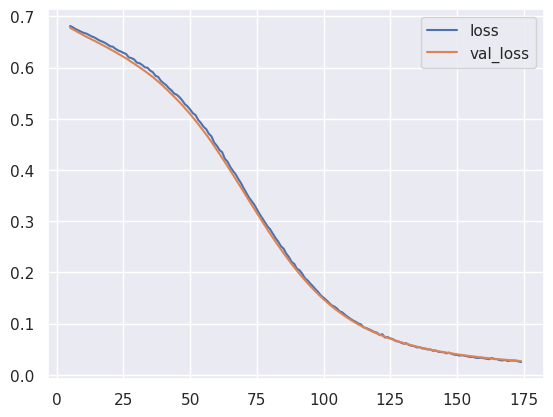

In [82]:
history_df = pd.DataFrame(predict.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()

<Axes: >

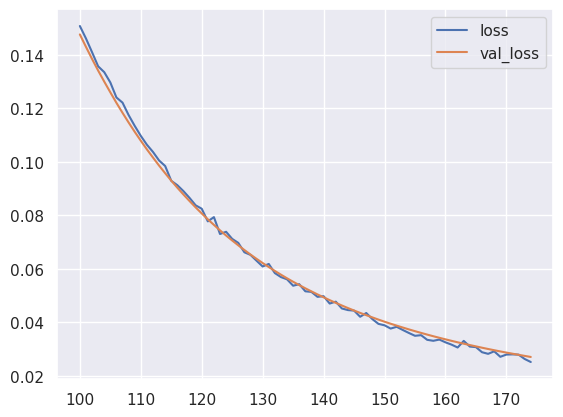

In [83]:
history_df.loc[100:, ['loss', 'val_loss']].plot()

This looks like  a great fit. Theres probably something wrong lol. I think it might be because the ratio of songs in spotify top 100 vs those not in is imbalanced

history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [88]:
print(f"Best Test Loss: {history_df['val_loss'].min(): .5f}")
print(f"Best Test Accuracy: {history_df['val_binary_accuracy'].max(): .5f}")

Best Test Loss:  0.02705
Best Test Accuracy:  0.99535


# Additional things that could be implemented are batch normalisation layer, Dropout layer that could probably help to address this potential overfit

# Things I want To Try Implementing

1)ROC-AUC as accuracy metric
2)More sophisticated Neural Network
3)XGBoost and Logistic Regression
4)Try changing the Target Variable to top 20 songs instead